# Installation & Importing Libraries

In [1]:
# Install the pyodbc library to allow Python to interface with ODBC databases (such as SQL Server)
!pip install pyodbc

# Import the pyodbc library 
import pyodbc

# Import the pandas library for data manipulation and analysis
import pandas as pd

# Setting Up Connection

In [42]:
# Establish a connection to the SQL Server database using pyodbc
conn = pyodbc.connect(
    'Driver={ODBC Driver 17 for SQL Server};'  # Specifies the ODBC driver for SQL Server
    'Server=Chaitanya;'  # Specifies the name of the server (replace with actual server name if needed)
    'Database=SalesData;'  # Specifies the name of the database to connect to
    'Trusted_Connection=yes;'  # Uses Windows Authentication for the connection
)

# Create a cursor object
cursor = conn.cursor()

# Execute a query to check the connection
cursor.execute("SELECT @@version;")

# Fetch and display the result
row = cursor.fetchone()
while row:
    print(row[0])
    row = cursor.fetchone()

Microsoft SQL Server 2022 (RTM) - 16.0.1000.6 (X64) 
	Oct  8 2022 05:58:25 
	Copyright (C) 2022 Microsoft Corporation
	Developer Edition (64-bit) on Windows 10 Pro 10.0 <X64> (Build 22631: )



# Inserting Records

In [21]:
# Insert records into the SalesPerson table
salespeople = [
    ('SP026', 'Liam', 'Ford'),
    ('SP027', 'Noah', 'Smith'),
    ('SP028', 'Oliver', 'Johnson'),
    ('SP029', 'Elijah', 'Williams'),
    ('SP030', 'William', 'Brown'),
    ('SP031', 'James', 'Jones'),
    ('SP032', 'Benjamin', 'Garcia'),
    ('SP033', 'Lucas', 'Miller'),
    ('SP034', 'Henry', 'Davis'),
    ('SP035', 'Alexander', 'Rodriguez'),
    ('SP036', 'Mason', 'Martinez'),
    ('SP037', 'Michael', 'Hernandez'),
    ('SP038', 'Ethan', 'Lopez'),
    ('SP039', 'Daniel', 'Wilson'),
    ('SP040', 'Jacob', 'Anderson'),
    ('SP041', 'Logan', 'Thomas'),
    ('SP042', 'Jackson', 'Taylor'),
    ('SP043', 'Levi', 'Moore'),
    ('SP044', 'Sebastian', 'Jackson'),
    ('SP045', 'Mateo', 'Martin'),
    ('SP046', 'Jack', 'Lee'),
    ('SP047', 'Owen', 'Perez'),
    ('SP048', 'Theodore', 'Thompson'),
    ('SP049', 'Aiden', 'White'),
    ('SP050', 'Samuel', 'Harris')
]

cursor.executemany("INSERT INTO SalesPerson (SalesPersonID, FirstName, LastName) VALUES (?, ?, ?)", salespeople)
conn.commit()

In [23]:
# Insert records into the Customer table
customers = [
    ('C026', 'Zoe Carter', 'CA'),
    ('C027', 'Sophia Lee', 'NY'),
    ('C028', 'Isabella Harris', 'TX'),
    ('C029', 'Mia Clark', 'FL'),
    ('C030', 'Amelia Lewis', 'IL'),
    ('C031', 'Harper Walker', 'PA'),
    ('C032', 'Evelyn Young', 'OH'),
    ('C033', 'Abigail Allen', 'MI'),
    ('C034', 'Emily Wright', 'AZ'),
    ('C035', 'Ella Scott', 'GA'),
    ('C036', 'Madison Torres', 'WA'),
    ('C037', 'Scarlett Nguyen', 'VA'),
    ('C038', 'Victoria Hill', 'MA'),
    ('C039', 'Aria Moore', 'CO'),
    ('C040', 'Grace Rivera', 'MD'),
    ('C041', 'Chloe Jackson', 'NC'),
    ('C042', 'Camila Martin', 'NJ'),
    ('C043', 'Penelope Lee', 'NV'),
    ('C044', 'Riley Hernandez', 'WI'),
    ('C045', 'Layla Lopez', 'MN'),
    ('C046', 'Lillian Roberts', 'CT'),
    ('C047', 'Nora Sanchez', 'MO'),
    ('C048', 'Zoey Miller', 'TN'),
    ('C049', 'Mila Davis', 'IN'),
    ('C050', 'Aubrey Garcia', 'UT')
]

cursor.executemany("INSERT INTO Customer (CustomerID, CustomerName, CustomerState) VALUES (?, ?, ?)", customers)
conn.commit()

In [25]:
# Insert records into the Orders table
from datetime import datetime, timedelta

# Creating date range
start_date = datetime.strptime('2024-01-26', '%Y-%m-%d')
order_dates = [(start_date + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(25)]

orders = [(f'O0{26 + i}', f'C0{26 + i}', f'SP0{26 + i}', order_dates[i]) for i in range(25)]

cursor.executemany("INSERT INTO Orders (OrderNumber, CustomerID, SalesPersonID, OrderDate) VALUES (?, ?, ?, ?)", orders)
conn.commit()

In [27]:
# Insert records into the Items table
items = [
    ('I026', 'Product Z', 140.00),
    ('I027', 'Product Y', 145.00),
    ('I028', 'Product X', 150.00),
    ('I029', 'Product W', 155.00),
    ('I030', 'Product V', 160.00),
    ('I031', 'Product U', 165.00),
    ('I032', 'Product T', 170.00),
    ('I033', 'Product S', 175.00),
    ('I034', 'Product R', 180.00),
    ('I035', 'Product Q', 185.00),
    ('I036', 'Product P', 190.00),
    ('I037', 'Product O', 195.00),
    ('I038', 'Product N', 200.00),
    ('I039', 'Product M', 205.00),
    ('I040', 'Product L', 210.00),
    ('I041', 'Product K', 215.00),
    ('I042', 'Product J', 220.00),
    ('I043', 'Product I', 225.00),
    ('I044', 'Product H', 230.00),
    ('I045', 'Product G', 235.00),
    ('I046', 'Product F', 240.00),
    ('I047', 'Product E', 245.00),
    ('I048', 'Product D', 250.00),
    ('I049', 'Product C', 255.00),
    ('I050', 'Product B', 260.00)
]

cursor.executemany("INSERT INTO Items (ItemID, Item, ItemPrice) VALUES (?, ?, ?)", items)
conn.commit()

In [29]:
# Insert records into the OrderDetails table
order_details = [
    ('D026', 'O026', 'I026', 2),
    ('D027', 'O027', 'I027', 1),
    ('D028', 'O028', 'I028', 3),
    ('D029', 'O029', 'I029', 4),
    ('D030', 'O030', 'I030', 1),
    ('D031', 'O031', 'I031', 2),
    ('D032', 'O032', 'I032', 3),
    ('D033', 'O033', 'I033', 4),
    ('D034', 'O034', 'I034', 5),
    ('D035', 'O035', 'I035', 6),
    ('D036', 'O036', 'I036', 7),
    ('D037', 'O037', 'I037', 8),
    ('D038', 'O038', 'I038', 9),
    ('D039', 'O039', 'I039', 10),
    ('D040', 'O040', 'I040', 2),
    ('D041', 'O041', 'I041', 3),
    ('D042', 'O042', 'I042', 4),
    ('D043', 'O043', 'I043', 5),
    ('D044', 'O044', 'I044', 6),
    ('D045', 'O045', 'I045', 7),
    ('D046', 'O046', 'I046', 8),
    ('D047', 'O047', 'I047', 9),
    ('D048', 'O048', 'I048', 10),
    ('D049', 'O049', 'I049', 1),
    ('D050', 'O050', 'I050', 2)
]

cursor.executemany("INSERT INTO OrderDetails (OrderDetailID, OrderNumber, ItemID, ItemQuantity) VALUES (?, ?, ?, ?)", order_details)
conn.commit()

# Visualizations

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# SQL query to fetch sales by customer including those with no sales
query_customer_sales = """
SELECT c.CustomerName, ISNULL(SUM(od.ItemQuantity * i.ItemPrice), 0) AS TotalSales
FROM Customer c
LEFT JOIN Orders o ON c.CustomerID = o.CustomerID
LEFT JOIN OrderDetails od ON o.OrderNumber = od.OrderNumber
LEFT JOIN Items i ON od.ItemID = i.ItemID
GROUP BY c.CustomerName
ORDER BY TotalSales DESC;
"""

# Execute the query and store results in a DataFrame
df_customer_sales = pd.read_sql_query(query_customer_sales, conn)

# Display the DataFrame as a table to ensure all customers are included
print("Sales by Customer Table (Including Customers with No Sales):")
df_customer_sales

Sales by Customer Table (Including Customers with No Sales):


C:\Users\palad\AppData\Local\Temp\ipykernel_21936\2579167737.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customer_sales = pd.read_sql_query(query_customer_sales, conn)


,CustomerName,TotalSales
0,Zoey Miller,2500.0
1,Nora Sanchez,2205.0
2,Aria Moore,2050.0
3,Kevin Hayes,2000.0
4,Lillian Roberts,1920.0
5,Victoria Hill,1800.0
6,Layla Lopez,1645.0
7,Scarlett Nguyen,1560.0
8,Grace Cox,1475.0
9,Julia Torres,1400.0


C:\Users\palad\AppData\Local\Temp\ipykernel_21936\3114822517.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customer_sales = pd.read_sql_query(query_customer_sales, conn)


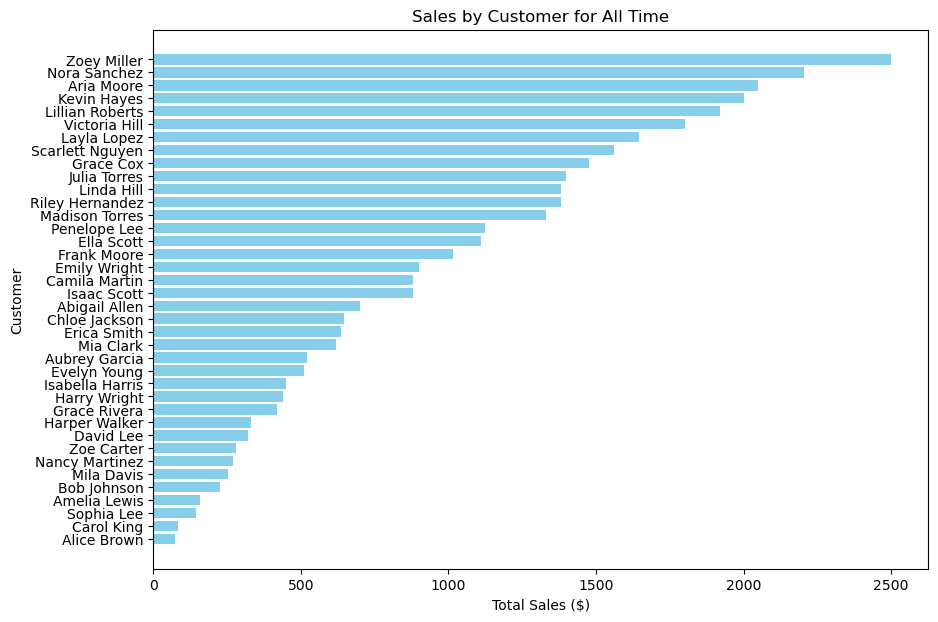

In [56]:
# Query to fetch sales by customer
query_customer_sales = """
SELECT c.CustomerName, SUM(od.ItemQuantity * i.ItemPrice) AS TotalSales
FROM Customer c
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN OrderDetails od ON o.OrderNumber = od.OrderNumber
JOIN Items i ON od.ItemID = i.ItemID
GROUP BY c.CustomerName
ORDER BY TotalSales DESC;
"""

# Execute the query and store results in a DataFrame
df_customer_sales = pd.read_sql_query(query_customer_sales, conn)

# Plotting sales by customer
plt.figure(figsize=(10, 7))  # Increased figure size
plt.barh(df_customer_sales['CustomerName'], df_customer_sales['TotalSales'], color='skyblue')
plt.xlabel('Total Sales ($)')
plt.ylabel('Customer')
plt.title('Sales by Customer for All Time')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest sales at the top
plt.show()

C:\Users\palad\AppData\Local\Temp\ipykernel_21936\3899835261.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_state_sales = pd.read_sql_query(query_state_sales, conn)


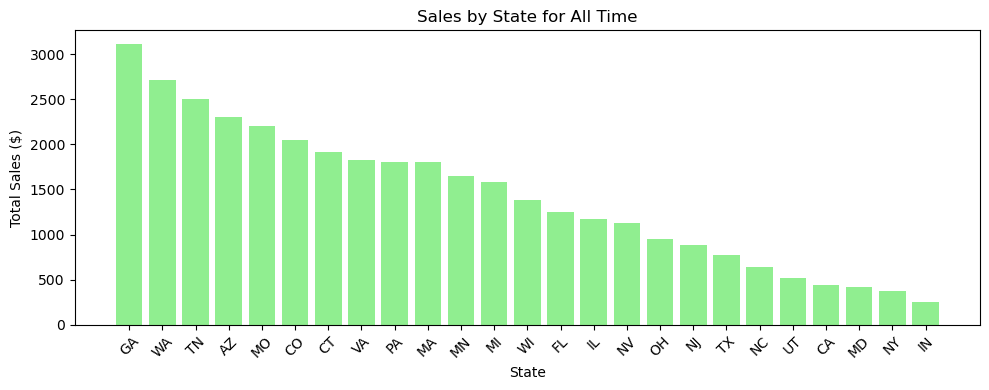

In [60]:
# SQL query to fetch sales by state
query_state_sales = """
SELECT c.CustomerState, SUM(od.ItemQuantity * i.ItemPrice) AS TotalSales
FROM Customer c
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN OrderDetails od ON o.OrderNumber = od.OrderNumber
JOIN Items i ON od.ItemID = i.ItemID
GROUP BY c.CustomerState
ORDER BY TotalSales DESC;
"""

# Execute the query and store results in a DataFrame
df_state_sales = pd.read_sql_query(query_state_sales, conn)

# Plotting sales by state
plt.figure(figsize=(10, 4))  # Adjusted figure size for readability
plt.bar(df_state_sales['CustomerState'], df_state_sales['TotalSales'], color='lightgreen')
plt.xlabel('State')
plt.ylabel('Total Sales ($)')
plt.title('Sales by State for All Time')
plt.xticks(rotation=45)  # Rotate state labels for better visibility
plt.tight_layout()  # Adjust layout to fit elements
plt.show()